In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
company = "TSLA"
start = dt.datetime(2005,1,1)
end = dt.datetime(2023,1,1)
# end = dt.datetime.now()

yfin.pdr_override()
data = pdr.get_data_yahoo(company, start, end)
# data

[*********************100%%**********************]  1 of 1 completed


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))


model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
97/97 [==============================] - 29s 119ms/step - loss: 0.0035
Epoch 2/25
97/97 [==============================] - 7s 76ms/step - loss: 0.0011
Epoch 3/25
97/97 [==============================] - 8s 86ms/step - loss: 9.7048e-04
Epoch 4/25
97/97 [==============================] - 8s 82ms/step - loss: 9.7364e-04
Epoch 5/25
97/97 [==============================] - 8s 78ms/step - loss: 8.2620e-04
Epoch 6/25
97/97 [==============================] - 8s 87ms/step - loss: 7.3725e-04
Epoch 7/25
97/97 [==============================] - 7s 76ms/step - loss: 7.0772e-04
Epoch 8/25
97/97 [==============================] - 8s 85ms/step - loss: 9.7588e-04
Epoch 9/25
97/97 [==============================] - 8s 86ms/step - loss: 6.3257e-04
Epoch 10/25
97/97 [==============================] - 7s 76ms/step - loss: 5.5057e-04
Epoch 11/25
97/97 [==============================] - 8s 86ms/step - loss: 5.6653e-04
Epoch 12/25
97/97 [==============================] - 10s 100ms/step - loss: 5.80

[*********************100%%**********************]  1 of 1 completed


10/10 [==============================] - 1s 23ms/step


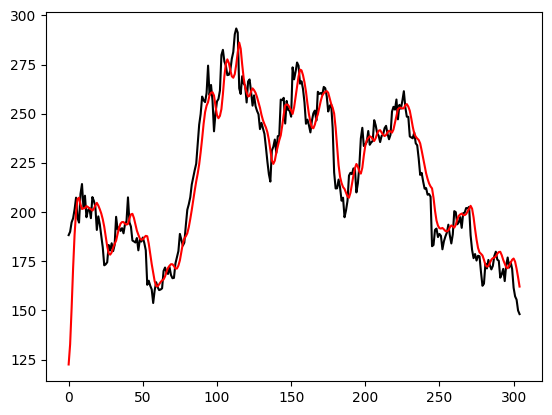

In [ ]:
test_start = dt.datetime(2023, 2, 2)
test_end = dt.datetime.now()

test_data = pdr.get_data_yahoo(company, test_start, test_end)
actual_price = test_data["Close"].values

total_dataset = pd.concat((data["Close"], test_data["Close"]))

model_input = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_input = model_input.reshape(-1,1)
model_input = scaler.transform(model_input)


x_test = []

for x in range(prediction_days, len(model_input)):
  x_test.append(model_input[x-prediction_days:x])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

plt.plot(actual_price, color="black")
plt.plot(predictions, color="red")

In [ ]:
real_data = [model_input[len(model_input) + 1 - prediction_days:len(model_input + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

predict = model.predict(real_data)
predict = scaler.inverse_transform(predict)
print(predict)

1/1 [==============================] - 2s 2s/step
[[157.70772]]
